# Titanic
**The Titanic was a luxury British steamship that sank in the early hours of April 15, 1912 after striking an iceberg, leading to the deaths of more than 1,500 passengers and crew.**


**In this dataset we'll try to predict wheather a person on the titanic ship survived or not!**

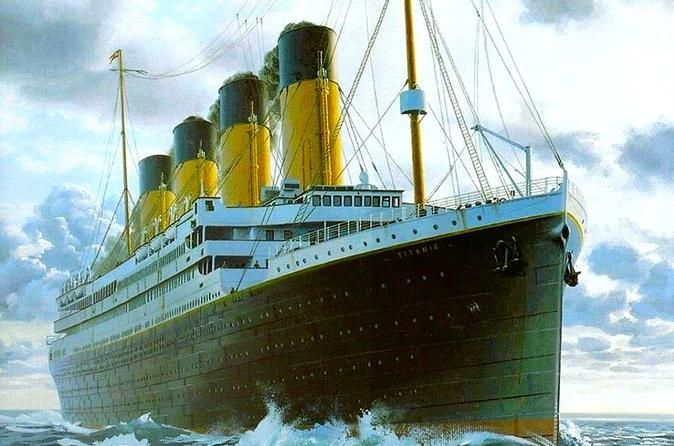

In [1]:
#importing essential libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset

train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

In [3]:
train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
test.head(5)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

## 1.Finding how many Null value are there

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

*from the above two cells we can se that there are null values present in both'train' and 'test' set*

***for better visualization of null value***

In [7]:
import missingno as msno  #displying null values via graph

<AxesSubplot:>

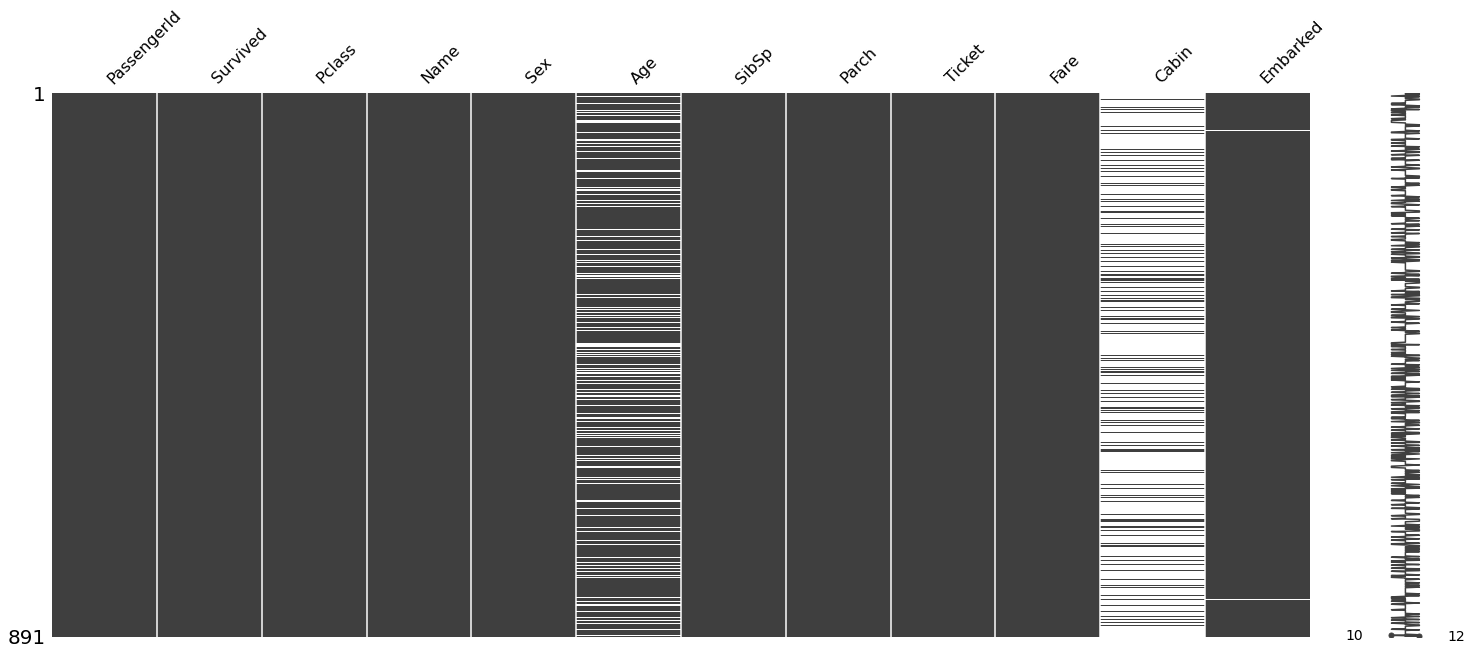

In [8]:
msno.matrix(train)

<AxesSubplot:>

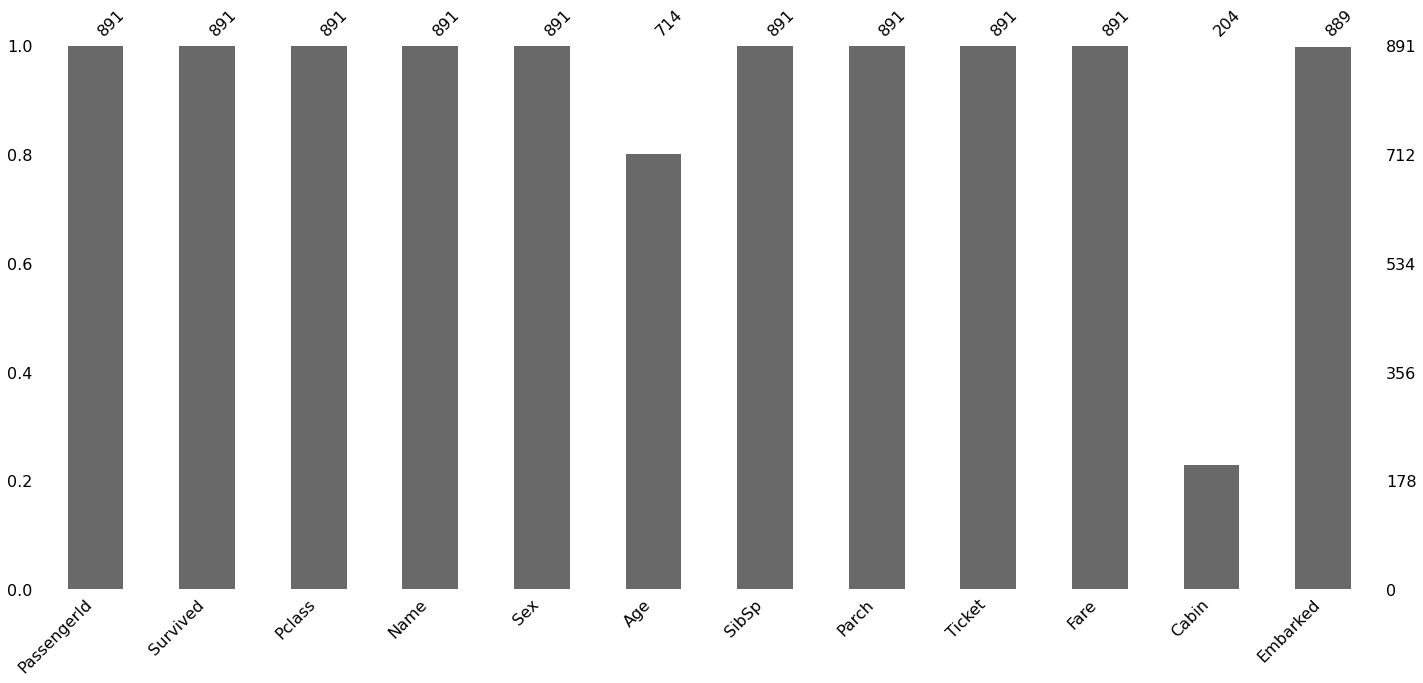

In [9]:
msno.bar(train)

<AxesSubplot:>

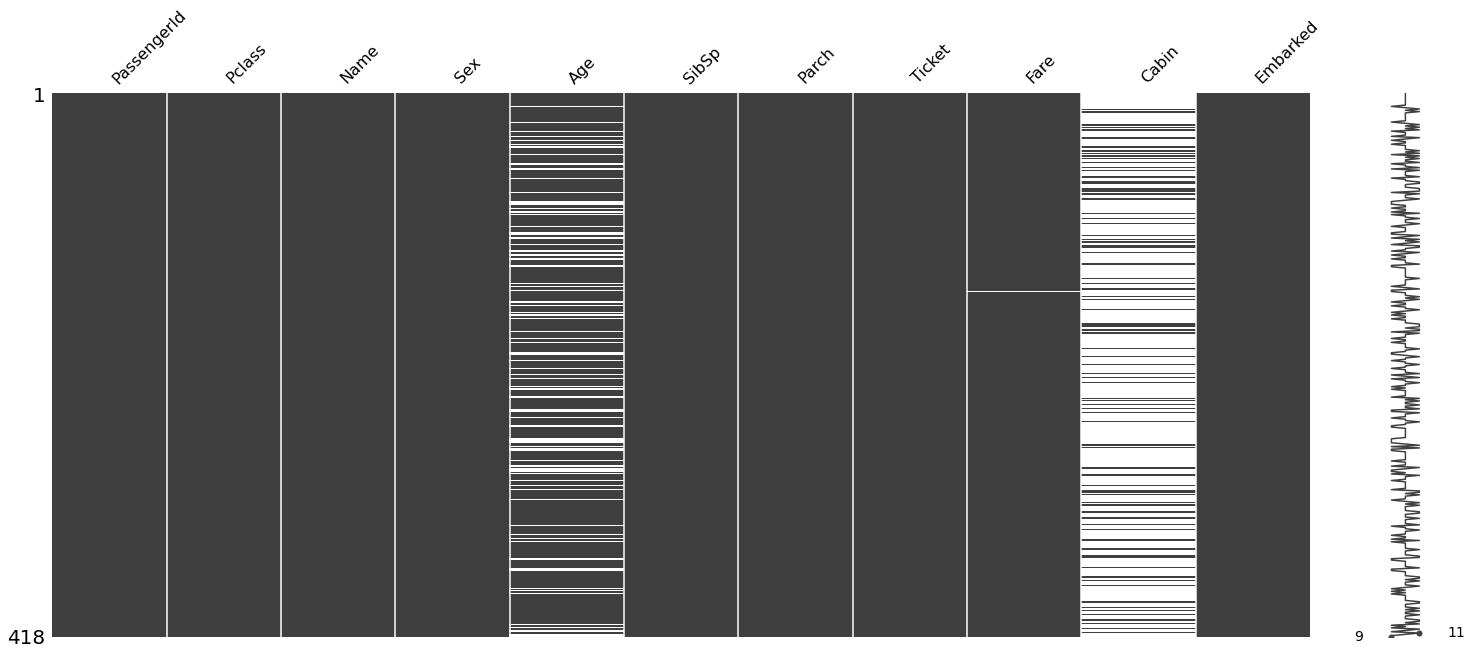

In [10]:
msno.matrix(test)


<AxesSubplot:>

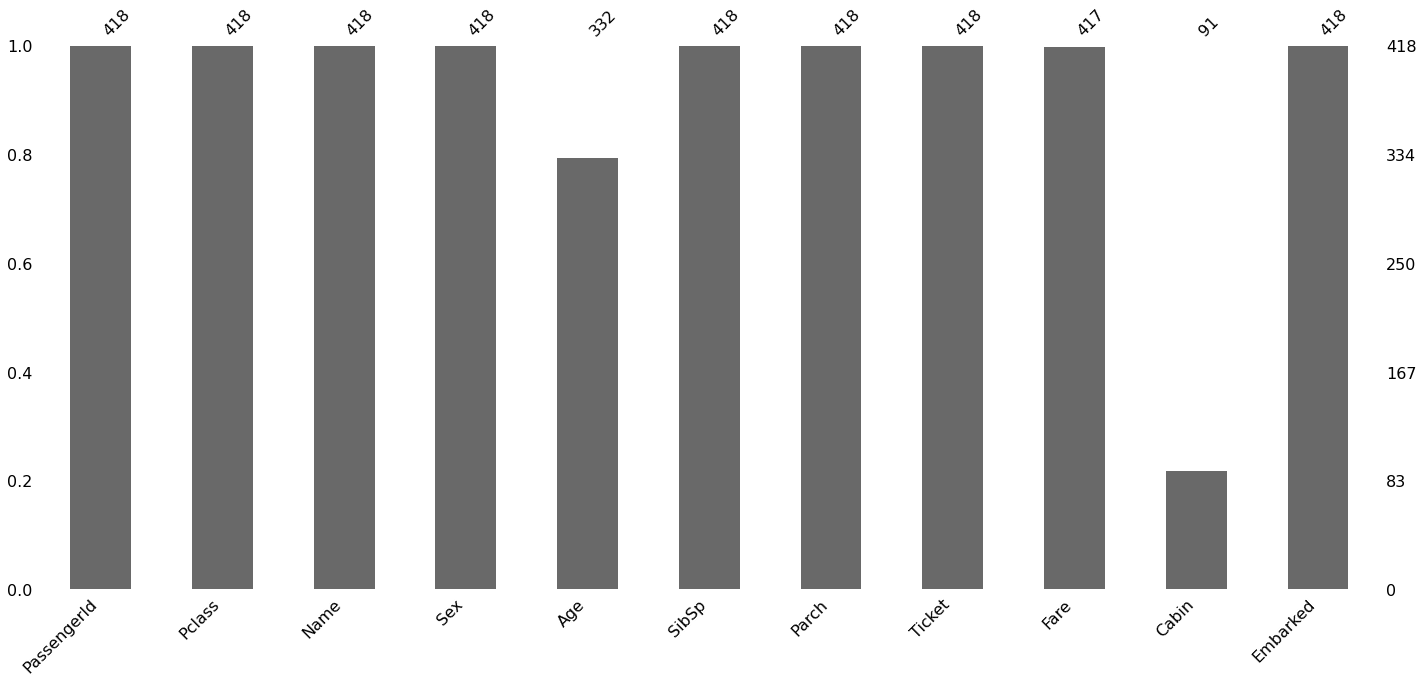

In [11]:
msno.bar(test)

*Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of the data**

*I will fill the value after analysing relationship between various featuress*

## 2-EDA

<AxesSubplot:xlabel='Survived', ylabel='count'>

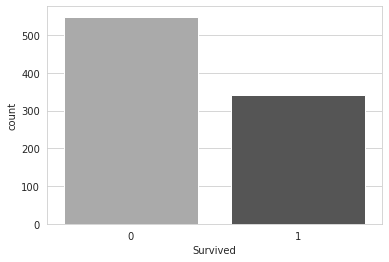

In [12]:
#number of passenger survived (training set)
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train, palette='gist_gray_r')

# we can see that more then 500 people lost thier life and approx 310-320 passeger survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

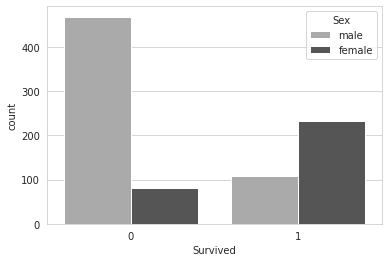

In [13]:
#survivors based on sex

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='gist_gray_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

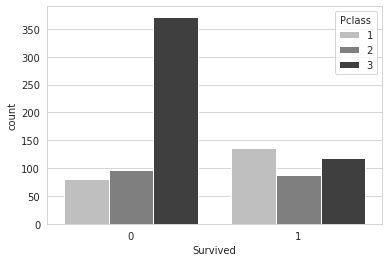

In [14]:
#survivors based on passengerclass

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='gist_gray_r')

<AxesSubplot:xlabel='Age'>

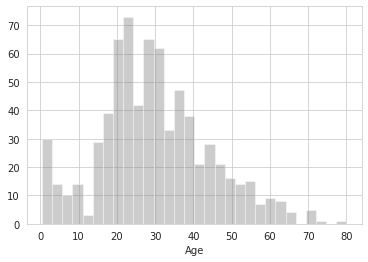

In [15]:
# counting the number of person based on age

sns.distplot(train['Age'].dropna(),kde=False,color='gray',bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

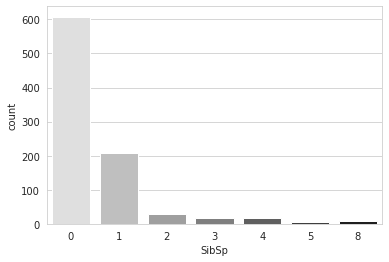

In [16]:
#person having siblings on the ship

sns.countplot(x='SibSp',data=train, palette='gist_gray_r', alpha= 1)


# we can see that there were 600 person with no sibling, 200 person with one sibling,....

<AxesSubplot:>

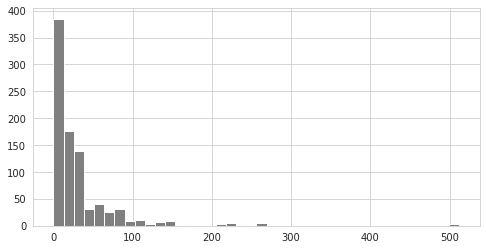

In [17]:
#fare

train['Fare'].hist(color='grey',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Age', ylabel='Density'>

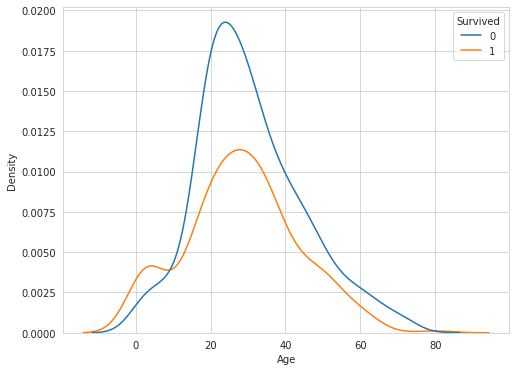

In [18]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=train,x='Age',hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

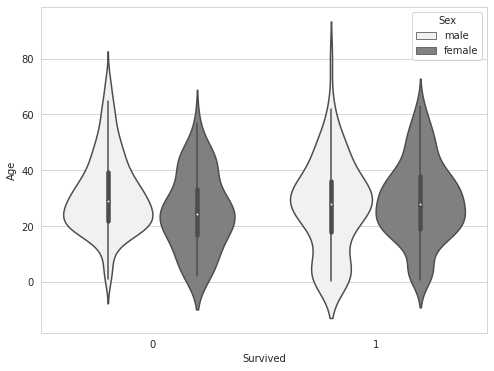

In [19]:
plt.figure(figsize=(8,6))
sns.violinplot(data=train,x='Survived',y='Age',hue='Sex',color = 'grey')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

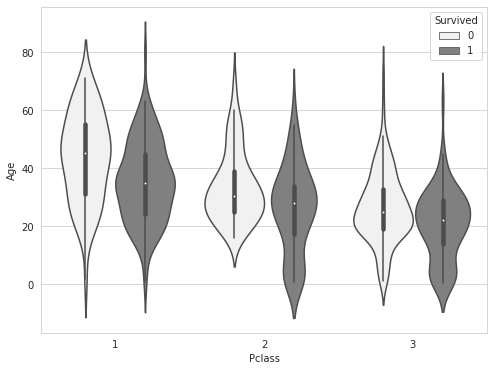

In [20]:
#plotting number of people with their age in pclass,based on surviving

plt.figure(figsize=(8,6))
sns.violinplot(data=train,x='Pclass',y='Age',hue='Survived', color = 'grey')

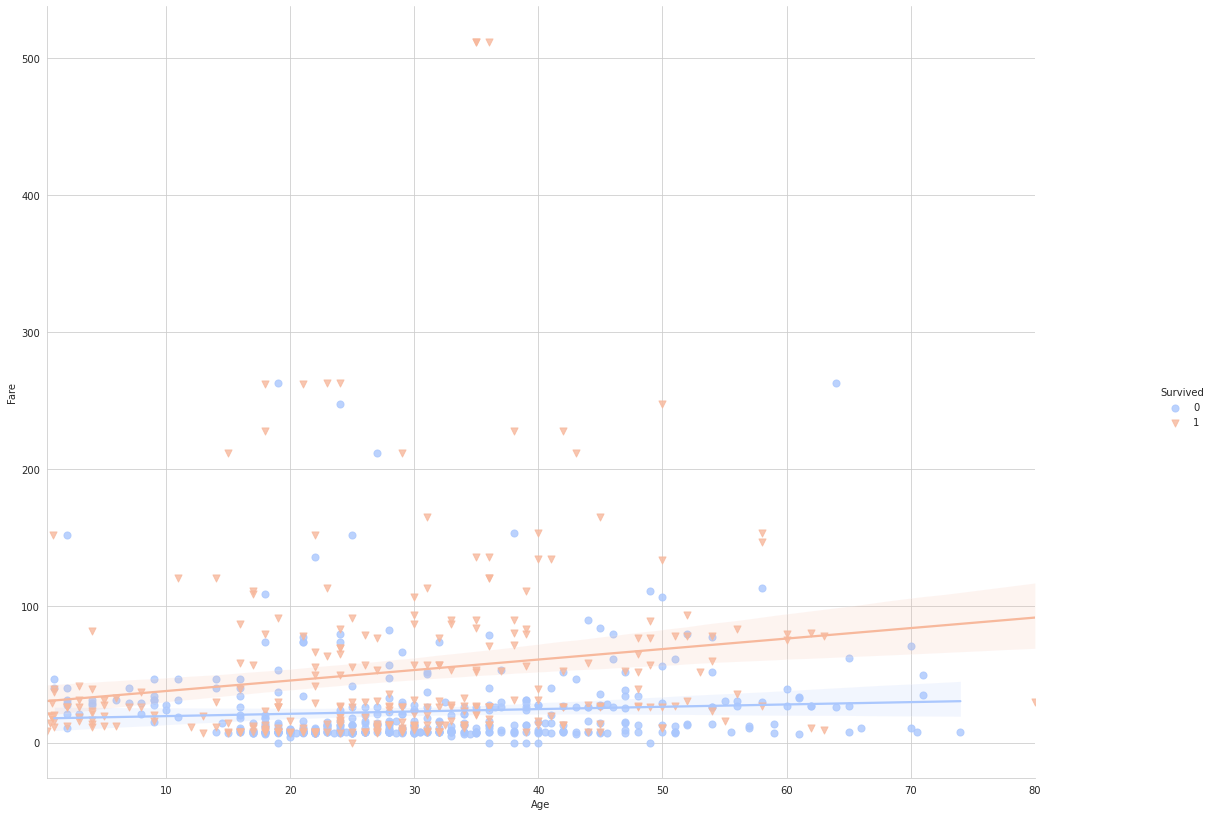

In [21]:
lmplot = sns.lmplot(data=train,x='Age',y='Fare', hue="Survived", markers=['o','v'],
                    palette = 'coolwarm',scatter_kws = {'s' : 50})
lmplot.fig.set_figheight(12)
lmplot.fig.set_figwidth(18)

**for prediction, I will first combine both the datset into a single dataset so i can do data manipulation and cleaning of data then I will seperate the dataset again.**

In [22]:
train['flag'] = 0
test['flag'] = 1
titanic_df = pd.concat([train, test], axis=0, copy=True)

In [23]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  flag         1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [24]:
titanic_df.describe()

PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare         flag  
count  1309.000000  1308.000000  1309.000000  
mean      0.385027    33.295479     0.319328  
std       0.865560    51.758668     0.466394  
min       0.000000     0.000000     0.000000  
25%       0.000000     7.895800     0.000000  
50%       0.000000    14.454200     0.000000  
75%       0.000000    31.275000     1.000000  
max       9.000000   512.329200     1.000000

## 3-Data Cleaning

***info of all the features present in dataset***

In [25]:
import pandas_profiling as pp

pp.ProfileReport(titanic_df, title = 'Pandas Profiling of Titanic')

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
#creating subset of dataset

titanic_df_subset = titanic_df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 
                                'Parch', 'Ticket', 'Fare', 'Cabin', 'Name', 'Embarked', 'flag']]

<AxesSubplot:>

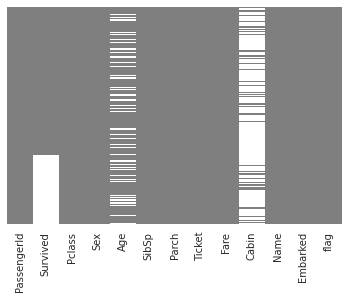

In [27]:
#checking null value again in the whole dataset

sns.heatmap(titanic_df_subset.isnull(),yticklabels=False,cbar=False,cmap='cubehelix', alpha = .5)

**from above we can see that there are many null values in cabin and age feature,ignore the survived feature since we want to predict that**

**Age**

we can simply take mean of the Age feature with respect to PassengerClass

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

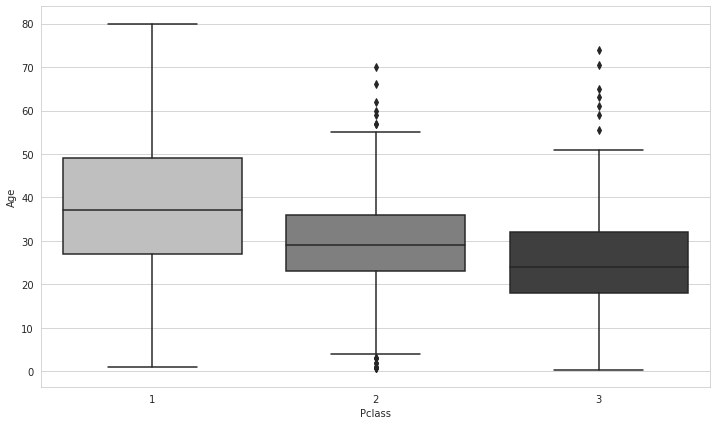

In [28]:
#creating plot for better visualisation

plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='gist_gray_r')

In [29]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [30]:
titanic_df_subset['Age'] = titanic_df_subset[['Age','Pclass']].apply(impute_age,axis=1)

In [31]:
titanic_df_subset['Age'] = titanic_df_subset['Age'].astype(int)   #converting from float to integer

**cabin**

Here i am replacing null value with U(unknown) and then creating dummy variable for each cabin class

In [32]:
titanic_df_subset['Cabin'] = titanic_df_subset['Cabin'].replace(np.nan, 'U')
titanic_df_subset['Cabin_Class'] = titanic_df_subset['Cabin'].astype(str).str[0]


In [33]:
titanic_df_subset.head(3)

PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch            Ticket  \
0            1       0.0       3    male   22      1      0         A/5 21171   
1            2       1.0       1  female   38      1      0          PC 17599   
2            3       1.0       3  female   26      0      0  STON/O2. 3101282   

      Fare Cabin                                               Name Embarked  \
0   7.2500     U                            Braund, Mr. Owen Harris        S   
1  71.2833   C85  Cumings, Mrs. John Bradley (Florence Briggs Th...        C   
2   7.9250     U                             Heikkinen, Miss. Laina        S   

   flag Cabin_Class  
0     0           U  
1     0           C  
2     0           U

In [34]:
#creating dummy var

cabclass = 'Cabin_Class'

Cabin_Class = titanic_df_subset[[cabclass]]
Cabin_Class = pd.get_dummies(Cabin_Class,drop_first=True)
Cabin_Class.head()

Cabin_Class_B  Cabin_Class_C  Cabin_Class_D  Cabin_Class_E  Cabin_Class_F  \
0              0              0              0              0              0   
1              0              1              0              0              0   
2              0              0              0              0              0   
3              0              1              0              0              0   
4              0              0              0              0              0   

   Cabin_Class_G  Cabin_Class_T  Cabin_Class_U  
0              0              0              1  
1              0              0              0  
2              0              0              1  
3              0              0              0  
4              0              0              1

<AxesSubplot:>

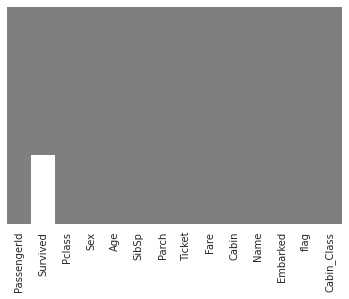

In [35]:
# checking whether all null value had been filled

sns.heatmap(titanic_df_subset.isnull(),yticklabels=False,cbar=False,cmap='cubehelix', alpha = .5)

**fare**

here i am dividing it into four distinct group so that there won't be any complexity with this feature

In [36]:
titanic_df_subset['Fare'].isnull().sum()

#it has one null value

1

In [37]:
titanic_df_subset['Fare'].fillna(titanic_df_subset['Fare'].dropna().median(), inplace=True)

In [38]:
titanic_df_subset.Fare[titanic_df_subset.Fare <= 7.91] = 0
titanic_df_subset.Fare[(titanic_df_subset.Fare > 7.91) & (titanic_df_subset.Fare <= 14.454)] = 1
titanic_df_subset.Fare[(titanic_df_subset.Fare > 14.454) & (titanic_df_subset.Fare <= 31)] = 2
titanic_df_subset.Fare[titanic_df_subset.Fare > 31] = 3
titanic_df_subset['Fare'] = titanic_df_subset['Fare'].astype(int) # Converting the fare column to integer type

titanic_df_subset.head()

PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch            Ticket  \
0            1       0.0       3    male   22      1      0         A/5 21171   
1            2       1.0       1  female   38      1      0          PC 17599   
2            3       1.0       3  female   26      0      0  STON/O2. 3101282   
3            4       1.0       1  female   35      1      0            113803   
4            5       0.0       3    male   35      0      0            373450   

   Fare Cabin                                               Name Embarked  \
0     0     U                            Braund, Mr. Owen Harris        S   
1     3   C85  Cumings, Mrs. John Bradley (Florence Briggs Th...        C   
2     1     U                             Heikkinen, Miss. Laina        S   
3     3  C123       Futrelle, Mrs. Jacques Heath (Lily May Peel)        S   
4     1     U                           Allen, Mr. William Henry        S   

   flag Cabin_Class  
0     0           U  
1     0           C  
2     0           U  
3     0           C  
4     0           U

**embarked**

In [39]:
#creating dummy var

mode_embarked = titanic_df_subset.Embarked.dropna().mode()[0]
titanic_df_subset["Embarked"].fillna(mode_embarked, inplace=True)

In [40]:
embark = pd.get_dummies(titanic_df_subset['Embarked'],drop_first=True)
embark

Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
413  0  1
414  0  0
415  0  1
416  0  1
417  0  0

[1309 rows x 2 columns]

**sex**

In [41]:
#again creating dummy var

sex = pd.get_dummies(titanic_df_subset['Sex'], drop_first = True)

In [42]:
#dropping column which are not useful

titanic_df_subset.drop(['Sex','Embarked','Ticket'],axis=1,inplace=True)

In [43]:
#adding newly created column

titanic_df_subset = pd.concat([titanic_df_subset,sex,embark,Cabin_Class],axis=1)

titanic_df_subset.head()

PassengerId  Survived  Pclass  Age  SibSp  Parch  Fare Cabin  \
0            1       0.0       3   22      1      0     0     U   
1            2       1.0       1   38      1      0     3   C85   
2            3       1.0       3   26      0      0     1     U   
3            4       1.0       1   35      1      0     3  C123   
4            5       0.0       3   35      0      0     1     U   

                                                Name  flag  ...  Q  S  \
0                            Braund, Mr. Owen Harris     0  ...  0  1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...     0  ...  0  0   
2                             Heikkinen, Miss. Laina     0  ...  0  1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)     0  ...  0  1   
4                           Allen, Mr. William Henry     0  ...  0  1   

   Cabin_Class_B  Cabin_Class_C  Cabin_Class_D  Cabin_Class_E  Cabin_Class_F  \
0              0              0              0              0              0   
1              0              1              0              0              0   
2              0              0              0              0              0   
3              0              1              0              0              0   
4              0              0              0              0              0   

   Cabin_Class_G  Cabin_Class_T  Cabin_Class_U  
0              0              0              1  
1              0              0              0  
2              0              0              1  
3              0              0              0  
4              0              0              1  

[5 rows x 22 columns]

**name**

this column is currently not being used, but we can at extract the title from the name. There are quite a few titles, but i am categorizing title into different group so to reduce it.

In [44]:
titanic_df_subset['Title'] = titanic_df_subset['Name'].map(lambda x: x.split('.')[0].split(' ')[-1])

In [45]:
print('The frequency of each title : ')
pd.DataFrame(titanic_df_subset['Title'].value_counts()).T

The frequency of each title : 


Mr  Miss  Mrs  Master  Dr  Rev  Col  Mlle  Major  Ms  Capt  Jonkheer  \
Title  757   260  197      61   8    8    4     2      2   2     1         1   

       Sir  Countess  Don  Lady  Dona  Mme  
Title    1         1    1     1     1    1

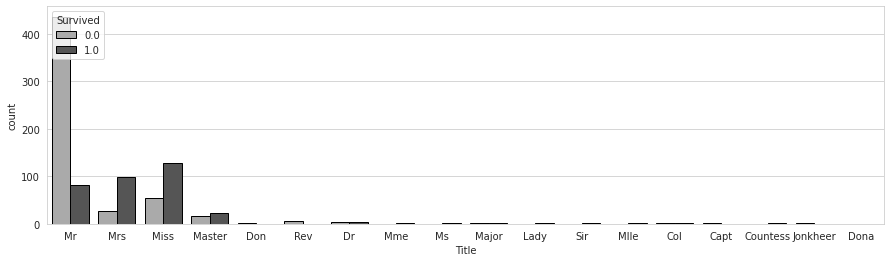

In [46]:
plt.figure(figsize=(15,4))
sns.countplot(data=titanic_df_subset, x='Title', ec = 'black', hue = titanic_df_subset['Survived'], palette = 'gist_gray_r')
plt.show()

#By looking at the above plot, we can say that if you were a Mr in Titanic,
#chances was you had died in the ocean. 
#On the other hand, being a Mrs and Miss does not appear to differ. Lastly, we can combine other titles in a title called other.

In [47]:
for dataset in titanic_df_subset:
    titanic_df_subset['Title'] = titanic_df_subset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    titanic_df_subset['Title'] = titanic_df_subset['Title'].replace('Mlle', 'Miss')
    titanic_df_subset['Title'] = titanic_df_subset['Title'].replace('Ms', 'Miss')
    titanic_df_subset['Title'] = titanic_df_subset['Title'].replace('Mme', 'Mrs')
    
titanic_df_subset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826

In [48]:
#dummy var for title

title = pd.get_dummies(titanic_df_subset['Title'], drop_first = True)

title

Miss  Mr  Mrs  Rare
0       0   1    0     0
1       0   0    1     0
2       1   0    0     0
3       0   0    1     0
4       0   1    0     0
..    ...  ..  ...   ...
413     0   1    0     0
414     0   0    0     1
415     0   1    0     0
416     0   1    0     0
417     0   0    0     0

[1309 rows x 4 columns]

In [49]:
#dropping some unuseful feature

titanic_df_subset.drop(['Title','Name','Cabin','Cabin_Class'],axis=1,inplace=True)

In [50]:
titanic_df_subset = pd.concat([titanic_df_subset,title],axis=1)

from IPython.display import display

pd.options.display.max_columns = None    
display(titanic_df_subset)                  #for watching all features



PassengerId  Survived  Pclass  Age  SibSp  Parch  Fare  flag  male  Q  S  \
0              1       0.0       3   22      1      0     0     0     1  0  1   
1              2       1.0       1   38      1      0     3     0     0  0  0   
2              3       1.0       3   26      0      0     1     0     0  0  1   
3              4       1.0       1   35      1      0     3     0     0  0  1   
4              5       0.0       3   35      0      0     1     0     1  0  1   
..           ...       ...     ...  ...    ...    ...   ...   ...   ... .. ..   
413         1305       NaN       3   24      0      0     1     1     1  0  1   
414         1306       NaN       1   39      0      0     3     1     0  0  0   
415         1307       NaN       3   38      0      0     0     1     1  0  1   
416         1308       NaN       3   24      0      0     1     1     1  0  1   
417         1309       NaN       3   24      1      1     2     1     1  0  0   

     Cabin_Class_B  Cabin_Class_C  Cabin_Class_D  Cabin_Class_E  \
0                0              0              0              0   
1                0              1              0              0   
2                0              0              0              0   
3                0              1              0              0   
4                0              0              0              0   
..             ...            ...            ...            ...   
413              0              0              0              0   
414              0              1              0              0   
415              0              0              0              0   
416              0              0              0              0   
417              0              0              0              0   

     Cabin_Class_F  Cabin_Class_G  Cabin_Class_T  Cabin_Class_U  Miss  Mr  \
0                0              0              0              1     0   1   
1                0              0              0              0     0   0   
2                0              0              0              1     1   0   
3                0              0              0              0     0   0   
4                0              0              0              1     0   1   
..             ...            ...            ...            ...   ...  ..   
413              0              0              0              1     0   1   
414              0              0              0              0     0   0   
415              0              0              0              1     0   1   
416              0              0              0              1     0   1   
417              0              0              0              1     0   0   

     Mrs  Rare  
0      0     0  
1      1     0  
2      0     0  
3      1     0  
4      0     0  
..   ...   ...  
413    0     0  
414    0     1  
415    0     0  
416    0     0  
417    0     0  

[1309 rows x 23 columns]

<AxesSubplot:>

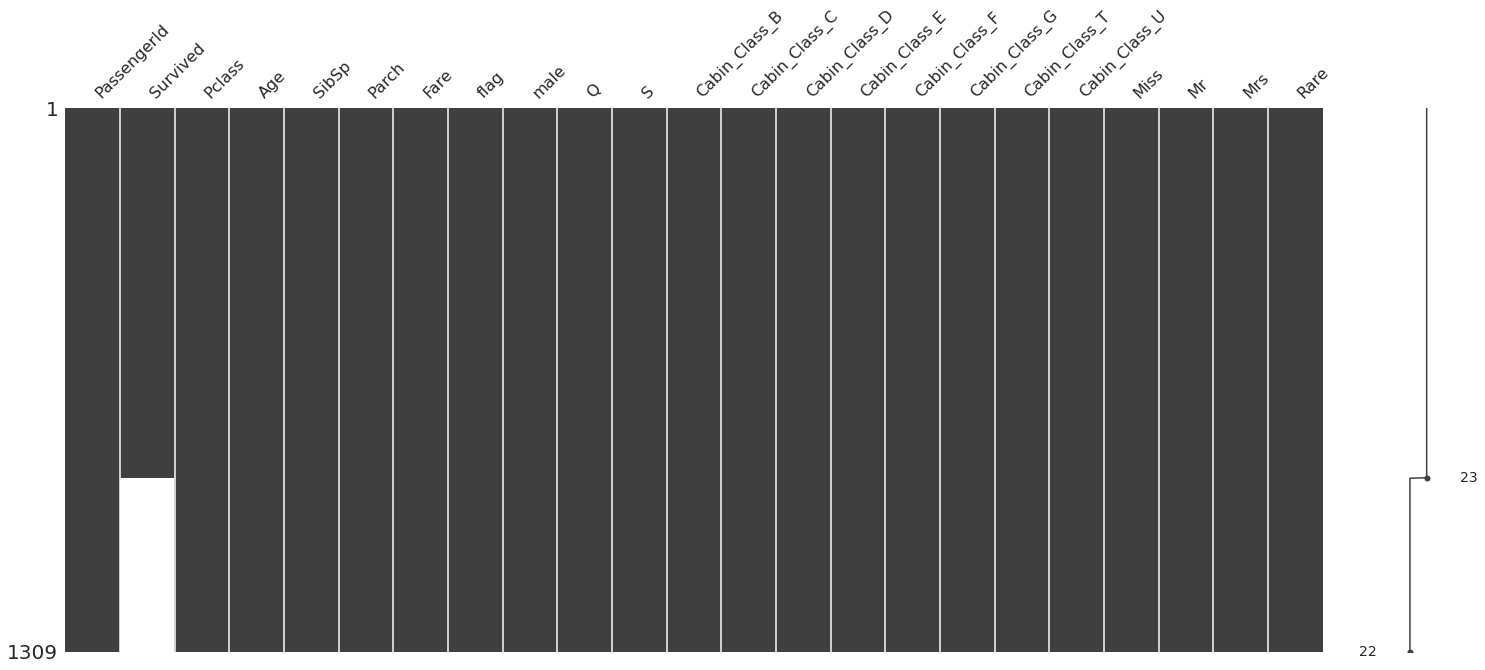

In [51]:
import missingno as msno

msno.matrix(titanic_df_subset)

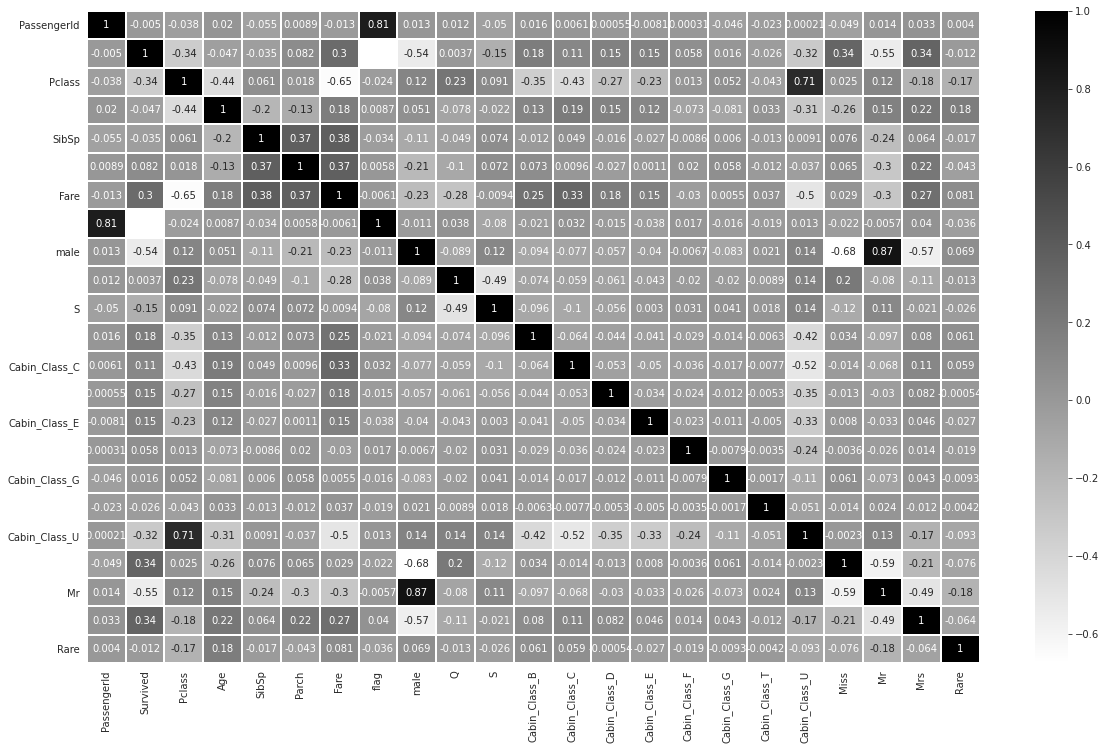

In [52]:
#plotting the correlation among various features

sns.heatmap(titanic_df_subset.corr(),annot=True,cmap='gist_gray_r',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

**splitting the dataset again since the features has been cleaned**

In [53]:
titanic_train_set = titanic_df_subset[titanic_df_subset['flag']==0]
titanic_test_set = titanic_df_subset[titanic_df_subset['flag']==1]

titanic_train_set['Survived'] = titanic_train_set['Survived'].astype(int) #Converting target feature to int

In [54]:
print(titanic_train_set.shape)
print(titanic_test_set.shape)

(891, 23)
(418, 23)


In [55]:
titanic_train_set.head(3)

PassengerId  Survived  Pclass  Age  SibSp  Parch  Fare  flag  male  Q  S  \
0            1         0       3   22      1      0     0     0     1  0  1   
1            2         1       1   38      1      0     3     0     0  0  0   
2            3         1       3   26      0      0     1     0     0  0  1   

   Cabin_Class_B  Cabin_Class_C  Cabin_Class_D  Cabin_Class_E  Cabin_Class_F  \
0              0              0              0              0              0   
1              0              1              0              0              0   
2              0              0              0              0              0   

   Cabin_Class_G  Cabin_Class_T  Cabin_Class_U  Miss  Mr  Mrs  Rare  
0              0              0              1     0   1    0     0  
1              0              0              0     0   0    1     0  
2              0              0              1     1   0    0     0

In [56]:
titanic_test_set.head(3)

PassengerId  Survived  Pclass  Age  SibSp  Parch  Fare  flag  male  Q  S  \
0          892       NaN       3   34      0      0     0     1     1  1  0   
1          893       NaN       3   47      1      0     0     1     0  0  1   
2          894       NaN       2   62      0      0     1     1     1  1  0   

   Cabin_Class_B  Cabin_Class_C  Cabin_Class_D  Cabin_Class_E  Cabin_Class_F  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   

   Cabin_Class_G  Cabin_Class_T  Cabin_Class_U  Miss  Mr  Mrs  Rare  
0              0              0              1     0   1    0     0  
1              0              0              1     0   0    1     0  
2              0              0              1     0   1    0     0

In [57]:
# Removeing the columns which are not needed.Test Flag is not required since we split the data already,
#and the Survived column is unnecessary in the test set

titanic_train_set = titanic_train_set.drop(['flag','PassengerId'], axis = 1)    
titanic_test_set = titanic_test_set.drop(['Survived', 'flag'], axis = 1)


In [58]:
print(titanic_train_set.shape)
print(titanic_test_set.shape)

(891, 21)
(418, 21)


## 4 Prediction

**splitting the data into training and testing set to preform different models on it**

In [59]:
from sklearn.model_selection import train_test_split

X = titanic_train_set.drop(['Survived'], axis = 1)  
y = titanic_train_set[['Survived']]

In [60]:
X

Pclass  Age  SibSp  Parch  Fare  male  Q  S  Cabin_Class_B  \
0         3   22      1      0     0     1  0  1              0   
1         1   38      1      0     3     0  0  0              0   
2         3   26      0      0     1     0  0  1              0   
3         1   35      1      0     3     0  0  1              0   
4         3   35      0      0     1     1  0  1              0   
..      ...  ...    ...    ...   ...   ... .. ..            ...   
886       2   27      0      0     1     1  0  1              0   
887       1   19      0      0     2     0  0  1              1   
888       3   24      1      2     2     0  0  1              0   
889       1   26      0      0     2     1  0  0              0   
890       3   32      0      0     0     1  1  0              0   

     Cabin_Class_C  Cabin_Class_D  Cabin_Class_E  Cabin_Class_F  \
0                0              0              0              0   
1                1              0              0              0   
2                0              0              0              0   
3                1              0              0              0   
4                0              0              0              0   
..             ...            ...            ...            ...   
886              0              0              0              0   
887              0              0              0              0   
888              0              0              0              0   
889              1              0              0              0   
890              0              0              0              0   

     Cabin_Class_G  Cabin_Class_T  Cabin_Class_U  Miss  Mr  Mrs  Rare  
0                0              0              1     0   1    0     0  
1                0              0              0     0   0    1     0  
2                0              0              1     1   0    0     0  
3                0              0              0     0   0    1     0  
4                0              0              1     0   1    0     0  
..             ...            ...            ...   ...  ..  ...   ...  
886              0              0              1     0   0    0     1  
887              0              0              0     1   0    0     0  
888              0              0              1     1   0    0     0  
889              0              0              0     0   1    0     0  
890              0              0              1     0   1    0     0  

[891 rows x 20 columns]

In [61]:
y

Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [63]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(596, 20) (596, 1)
(295, 20) (295, 1)


In [64]:
y_test.head()

Survived
709         1
439         0
840         0
720         1
39          1

**Model Selction**

here i am taking different models and will choose the model with highest accuracy.

In [65]:
X_test.head()

Pclass  Age  SibSp  Parch  Fare  male  Q  S  Cabin_Class_B  \
709       3   24      1      1     2     1  0  0              0   
439       2   31      0      0     1     1  0  1              0   
840       3   20      0      0     1     1  0  1              0   
720       2    6      0      1     3     0  0  1              0   
39        3   14      1      0     1     0  0  0              0   

     Cabin_Class_C  Cabin_Class_D  Cabin_Class_E  Cabin_Class_F  \
709              0              0              0              0   
439              0              0              0              0   
840              0              0              0              0   
720              0              0              0              0   
39               0              0              0              0   

     Cabin_Class_G  Cabin_Class_T  Cabin_Class_U  Miss  Mr  Mrs  Rare  
709              0              0              1     0   0    0     0  
439              0              0              1     0   1    0     0  
840              0              0              1     0   1    0     0  
720              0              0              1     1   0    0     0  
39               0              0              1     1   0    0     0

### logistic regression

In [66]:
X_train.head()

Pclass  Age  SibSp  Parch  Fare  male  Q  S  Cabin_Class_B  \
6         1   54      0      0     3     1  0  1              0   
718       3   24      0      0     2     1  1  0              0   
685       2   25      1      2     3     1  0  0              0   
73        3   26      1      0     2     1  0  0              0   
882       3   22      0      0     1     0  0  1              0   

     Cabin_Class_C  Cabin_Class_D  Cabin_Class_E  Cabin_Class_F  \
6                0              0              1              0   
718              0              0              0              0   
685              0              0              0              0   
73               0              0              0              0   
882              0              0              0              0   

     Cabin_Class_G  Cabin_Class_T  Cabin_Class_U  Miss  Mr  Mrs  Rare  
6                0              0              0     0   1    0     0  
718              0              0              1     0   1    0     0  
685              0              0              1     0   1    0     0  
73               0              0              1     0   1    0     0  
882              0              0              1     1   0    0     0

In [67]:
from sklearn.linear_model import LogisticRegression


logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)


LogisticRegression(solver='liblinear')

In [68]:
log_predictions = logmodel.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, log_predictions))
print('\n')
print(classification_report(y_test, log_predictions))

[[153  22]
 [ 29  91]]


              precision    recall  f1-score   support

           0       0.84      0.87      0.86       175
           1       0.81      0.76      0.78       120

    accuracy                           0.83       295
   macro avg       0.82      0.82      0.82       295
weighted avg       0.83      0.83      0.83       295



In [70]:
from sklearn.metrics import accuracy_score

log_model_acc = accuracy_score(y_test, log_predictions)
log_model_acc

0.8271186440677966

### knn

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
knn_predictions = knn.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, knn_predictions))
print('\n')
print(classification_report(y_test, knn_predictions))

[[158  17]
 [ 35  85]]


              precision    recall  f1-score   support

           0       0.82      0.90      0.86       175
           1       0.83      0.71      0.77       120

    accuracy                           0.82       295
   macro avg       0.83      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295



In [74]:
knn_model_acc = accuracy_score(y_test, knn_predictions)
knn_model_acc

0.823728813559322

### SVM

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')
svm.fit(X_train, y_train)

SVC()

In [78]:
svm_predictions = svm.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, svm_predictions))
print('\n')
print(classification_report(y_test, svm_predictions))

[[135  22]
 [ 26  85]]


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       157
           1       0.79      0.77      0.78       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [80]:
svm_model_acc = accuracy_score(y_test, svm_predictions)
svm_model_acc

0.8208955223880597

### Grid Seacrh for svc

let's see wheather our model will preform better with hyperparameter tuning for svc.

In [81]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(), param_grid, verbose = 3)

#C - regularisation
#gamma - tells us how far the influence of single training example reaches.

In [82]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.624, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.632, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.632, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.629, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.629, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.768, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.1, gamma=0.01, score=0.815, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.624, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.632, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.632, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.629, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.629, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.624, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [83]:
grid.best_estimator_     #values which shows the best preformance

SVC(C=1, gamma=0.1)

In [84]:
grid_predictions = grid.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, grid_predictions))
print('\n')
print(classification_report(y_test, grid_predictions))

[[136  21]
 [ 32  79]]


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [86]:
grid_model_acc = accuracy_score(y_test, grid_predictions)
grid_model_acc


#perform same as above

0.8022388059701493

### Naive byes

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [88]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [89]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [90]:
nb_predictions = nb.predict(X_test)

In [91]:
print(confusion_matrix(y_test, nb_predictions))
print('\n')
print(classification_report(y_test, nb_predictions))

[[133  42]
 [ 17 103]]


              precision    recall  f1-score   support

           0       0.89      0.76      0.82       175
           1       0.71      0.86      0.78       120

    accuracy                           0.80       295
   macro avg       0.80      0.81      0.80       295
weighted avg       0.81      0.80      0.80       295



In [92]:
nb_model_acc = accuracy_score(y_test, nb_predictions)
nb_model_acc

0.8

### Decission tree

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [94]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state=101)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [95]:
dtree_predictions = dtree.predict(X_test)

In [96]:
print(confusion_matrix(y_test, dtree_predictions))
print('\n')
print(classification_report(y_test, dtree_predictions))

[[147  22]
 [ 36  90]]


              precision    recall  f1-score   support

           0       0.80      0.87      0.84       169
           1       0.80      0.71      0.76       126

    accuracy                           0.80       295
   macro avg       0.80      0.79      0.80       295
weighted avg       0.80      0.80      0.80       295



In [97]:
dtree_model_acc = accuracy_score(y_test, dtree_predictions)
dtree_model_acc

0.8033898305084746

### Random forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 101)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=101)

In [99]:
rfc_predictions = rfc.predict(X_test)

In [100]:
print(confusion_matrix(y_test, rfc_predictions))
print('\n')
print(classification_report(y_test, rfc_predictions))

[[152  17]
 [ 36  90]]


              precision    recall  f1-score   support

           0       0.81      0.90      0.85       169
           1       0.84      0.71      0.77       126

    accuracy                           0.82       295
   macro avg       0.82      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295



In [101]:
rfc_model_acc = accuracy_score(y_test, rfc_predictions)
rfc_model_acc

0.8203389830508474

### XGBoost

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [103]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators=400,random_state=101)
xgbc.fit(X_train, y_train)

[08:35:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=4, num_parallel_tree=1, random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
xgbc_predictions = xgbc.predict(X_test)

In [105]:
print(confusion_matrix(y_test, xgbc_predictions))
print('\n')
print(classification_report(y_test, xgbc_predictions))
print('\n')

[[148  27]
 [ 30  90]]


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       175
           1       0.77      0.75      0.76       120

    accuracy                           0.81       295
   macro avg       0.80      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295





In [106]:
xgbc_model_acc = accuracy_score(y_test, xgbc_predictions)
xgbc_model_acc

0.8067796610169492

**model comparision**

In [107]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN','SVM', 'Naive byes', 'Decision Tree', 'Random Forest',
             'Xgboost','gird search svc'],
    'Score': [log_model_acc, knn_model_acc, svm_model_acc,nb_model_acc,
             dtree_model_acc,rfc_model_acc,xgbc_model_acc,grid_model_acc]})
models.sort_values(by='Score', ascending=False)

Model     Score
0  Logistic Regression  0.827119
1                  KNN  0.823729
2                  SVM  0.820896
5        Random Forest  0.820339
6              Xgboost  0.806780
4        Decision Tree  0.803390
7      gird search svc  0.802239
3           Naive byes  0.800000

**prediction of models are close to each other but from above we can see that logistict reg preforms quite well so i will choose it for model prediction on the test set** 

### test set prediction

In [108]:
titanic_test_set.head()

PassengerId  Pclass  Age  SibSp  Parch  Fare  male  Q  S  Cabin_Class_B  \
0          892       3   34      0      0     0     1  1  0              0   
1          893       3   47      1      0     0     0  0  1              0   
2          894       2   62      0      0     1     1  1  0              0   
3          895       3   27      0      0     1     1  0  1              0   
4          896       3   22      1      1     1     0  0  1              0   

   Cabin_Class_C  Cabin_Class_D  Cabin_Class_E  Cabin_Class_F  Cabin_Class_G  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   Cabin_Class_T  Cabin_Class_U  Miss  Mr  Mrs  Rare  
0              0              1     0   1    0     0  
1              0              1     0   0    1     0  
2              0              1     0   1    0     0  
3              0              1     0   1    0     0  
4              0              1     0   0    1     0

In [109]:
test_feat = titanic_test_set.drop(['PassengerId'], axis = 1)

test_id = titanic_test_set['PassengerId']

In [110]:
test_feat.head(3)

Pclass  Age  SibSp  Parch  Fare  male  Q  S  Cabin_Class_B  Cabin_Class_C  \
0       3   34      0      0     0     1  1  0              0              0   
1       3   47      1      0     0     0  0  1              0              0   
2       2   62      0      0     1     1  1  0              0              0   

   Cabin_Class_D  Cabin_Class_E  Cabin_Class_F  Cabin_Class_G  Cabin_Class_T  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   

   Cabin_Class_U  Miss  Mr  Mrs  Rare  
0              1     0   1    0     0  
1              1     0   0    1     0  
2              1     0   1    0     0

In [111]:
test_id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [112]:
titanic_test_predictions = logmodel.predict(test_feat) 

In [113]:
submission = pd.DataFrame({'PassengerId' : test_id, 'Survived': titanic_test_predictions})
submission.head(5)

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [114]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as our notebook
filename = 'Titanic_survivors_prediction.csv'

submission.to_csv('/kaggle/working/submission.csv', index=False)

print('Saved file: ' + filename)

Saved file: Titanic_survivors_prediction.csv
